In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
file_path = '/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'
df = pd.read_csv(file_path)

In [51]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [52]:
print(df.columns)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [53]:
features = [ 'Annual Income (k$)',
       'Spending Score (1-100)']
X = df[features].values

In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


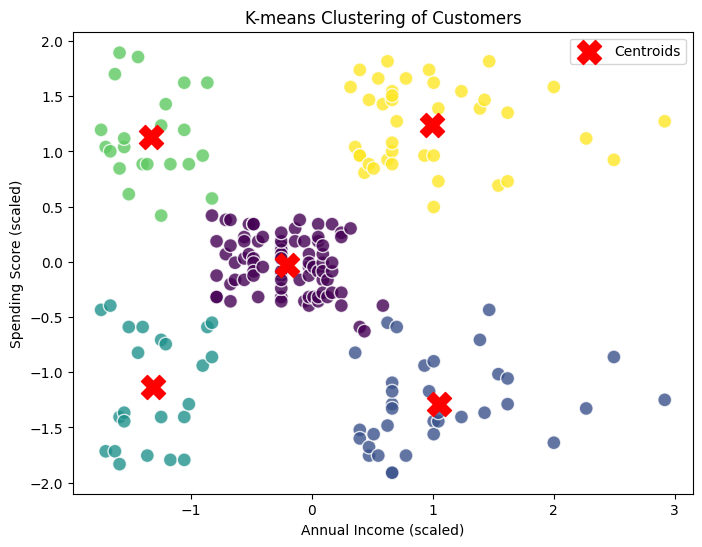

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=100, alpha=0.8, edgecolors='w')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('K-means Clustering of Customers')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

In [57]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
clusters_summary = pd.DataFrame(cluster_centers, columns=features)
print("Cluster Centers:")
print(clusters_summary)

Cluster Centers:
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           88.200000               17.114286
2           26.304348               20.913043
3           25.727273               79.363636
4           86.538462               82.128205
